In [1]:
# Import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [12]:
# Import CSV of Disneyland reviews
reviews_file = "Resources/DisneyReviews.csv"
reviewsdf = pd.read_csv(reviews_file, encoding='latin-1')
reviewsdf.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [13]:
# drop Disneyland_HongKong and Disneyland_Paris 
reviewsdf = reviewsdf.loc[(reviewsdf['Branch']=='Disneyland_California')&(reviewsdf['Year_Month']!='missing')]
reviewsdf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California
...,...,...,...,...,...,...
28499,92494269,1,2010-12,Canada,"Myself, along with my two chidren ages 8 and 1...",Disneyland_California
28500,92313324,4,2010-12,United States,We love Disneyland so much that we go there of...,Disneyland_California
28501,91799423,5,2010-10,Australia,As this was part of our international conferen...,Disneyland_California
28502,91657810,4,2010-12,Australia,we spent one day at disneyland withmy sister ...,Disneyland_California


In [14]:
# Format Year_Month to datetime
reviewsdf['YYYY-MM'] = pd.to_datetime(reviewsdf['Year_Month'], format='%Y-%m', errors='coerce').dropna()
reviewsdf['YYYY-MM'] = reviewsdf['YYYY-MM'].dt.strftime('%Y-%m')
reviewsdf.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California,2019-05
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04


In [15]:
# Filter out reviews before September 2014 and after April 2019
reviewsdf = reviewsdf[(reviewsdf['YYYY-MM'] >= "2014-09-01") & (reviewsdf['YYYY-MM'] <= "2019-04-30")]
reviewsdf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04
9625,670382191,5,2019-4,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California,2019-04
...,...,...,...,...,...,...,...
20806,233097639,5,2014-10,United States,Of course the cast members were friendly and t...,Disneyland_California,2014-10
20810,232980678,3,2014-10,United States,"Saw Disneyland and princesses and rides, and A...",Disneyland_California,2014-10
20823,232782547,4,2014-10,United States,"Well, first I'm in my early 60's so that chang...",Disneyland_California,2014-10
20836,232535051,5,2014-10,Australia,we visited both parks over two days. We have p...,Disneyland_California,2014-10


In [17]:
# Group by month/year and take an average of ratings
monthgroups = reviewsdf.groupby('YYYY-MM')
monthratings = monthgroups['Rating'].mean()
monthratings

YYYY-MM
2014-10    4.459649
2014-11    4.468750
2014-12    4.424000
2015-01    4.453947
2015-02    4.431953
2015-03    4.424893
2015-04    4.529954
2015-05    4.526154
2015-06    4.376093
2015-07    4.396011
2015-08    4.486880
2015-09    4.537975
2015-10    4.124567
2015-11    4.584541
2015-12    4.316327
2016-01    4.415888
2016-02    4.258065
2016-03    4.300813
2016-04    4.329457
2016-05    4.451220
2016-06    4.473282
2016-07    4.425926
2016-08    4.420168
2016-09    4.595745
2016-10    4.239286
2016-11    4.485714
2016-12    4.300000
2017-01    4.310526
2017-02    4.281046
2017-03    4.048485
2017-04    4.366337
2017-05    4.213115
2017-06    4.340541
2017-07    4.492228
2017-08    4.409574
2017-09    4.171642
2017-10    4.338542
2017-11    4.325000
2017-12    4.389937
2018-01    4.089431
2018-02    4.291339
2018-03    4.263566
2018-04    4.227586
2018-05    4.117647
2018-06    4.357616
2018-07    4.320442
2018-08    4.335766
2018-09    4.295918
2018-10    3.951923
2018-11    4

In [27]:
type(monthratings)

pandas.core.series.Series

In [6]:
# Import CSV of scraped Disneyland crowd and weather data
scrape_file = "Resources/scraped_data.csv"
scrapedf = pd.read_csv(scrape_file)
scrapedf.head()

,date,max_temp,min_temp,crowd_level
0,2014-09-01,82,68,6
1,2014-09-02,83,69,2
2,2014-09-03,82,69,1
3,2014-09-04,81,68,2
4,2014-09-05,85,66,2


In [7]:
scrapedf['Year_Month'] = pd.to_datetime(scrapedf['date'])
scrapedf.head()

,date,max_temp,min_temp,crowd_level,Year_Month
0,2014-09-01,82,68,6,2014-09-01
1,2014-09-02,83,69,2,2014-09-02
2,2014-09-03,82,69,1,2014-09-03
3,2014-09-04,81,68,2,2014-09-04
4,2014-09-05,85,66,2,2014-09-05


In [8]:
scrapedf['Year_Month'] = scrapedf['Year_Month'].dt.strftime('%Y-%m')
scrapedf.head()

,date,max_temp,min_temp,crowd_level,Year_Month
0,2014-09-01,82,68,6,2014-09
1,2014-09-02,83,69,2,2014-09
2,2014-09-03,82,69,1,2014-09
3,2014-09-04,81,68,2,2014-09
4,2014-09-05,85,66,2,2014-09


In [24]:
# Drop 'unknown' crowd level data
scrapedf = scrapedf.loc[(scrapedf['crowd_level']!='unknown')]
scrapedf['crowd_level'] = scrapedf['crowd_level'].astype(str).astype(int)

In [26]:
monthScraped = scrapedf.groupby('Year_Month')
# monthScraped['crowd_level'] = monthScraped['crowd_level'].astype(str).astype(int)
crowdByMonth = monthScraped['crowd_level'].mean()
crowdByMonth

Year_Month
2014-09    3.200000
2014-10    4.709677
2014-11    5.566667
2014-12    6.677419
2015-01    4.838710
2015-02    5.500000
2015-03    6.387097
2015-04    5.800000
2015-05    6.322581
2015-06    7.200000
2015-07    7.967742
2015-08    6.419355
2015-09    4.233333
2015-10    6.096774
2015-11    6.800000
2015-12    7.645161
2016-01    4.161290
2016-02    4.689655
2016-03    5.806452
2016-04    5.300000
2016-05    5.096774
2016-06    5.214286
2016-07    5.258065
2016-08    4.870968
2016-09    3.166667
2016-10    5.354839
2016-11    4.928571
2016-12    6.166667
2017-01    4.800000
2017-02    5.607143
2017-03    6.516129
2017-04    5.962963
2017-05    6.451613
2017-06    5.433333
2017-07    5.225806
2017-08    4.612903
2017-09    4.066667
2017-10    5.096774
2017-11    4.600000
2017-12    6.161290
2018-01    4.903226
2018-02    5.142857
2018-03    5.354839
2018-04    5.766667
2018-05    6.387097
2018-06    6.866667
2018-07    6.322581
2018-08    5.225806
2018-09    3.133333
2018-10  

In [29]:
crowdsAndRatings = pd.concat([monthratings, crowdByMonth], axis=1)

In [30]:
crowdsAndRatings

,Rating,crowd_level
2014-10,4.459649,4.709677
2014-11,4.468750,5.566667
2014-12,4.424000,6.677419
2015-01,4.453947,4.838710
2015-02,4.431953,5.500000
2015-03,4.424893,6.387097
2015-04,4.529954,5.800000
2015-05,4.526154,6.322581
2015-06,4.376093,7.200000
2015-07,4.396011,7.967742


In [31]:
crowdsAndRatings = crowdsAndRatings.dropna()
crowdsAndRatings

,Rating,crowd_level
2014-10,4.459649,4.709677
2014-11,4.468750,5.566667
2014-12,4.424000,6.677419
2015-01,4.453947,4.838710
2015-02,4.431953,5.500000
2015-03,4.424893,6.387097
2015-04,4.529954,5.800000
2015-05,4.526154,6.322581
2015-06,4.376093,7.200000
2015-07,4.396011,7.967742


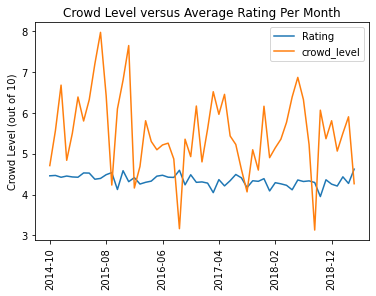

In [43]:
crowdsAndRatings.plot(kind="line")
plt.title('Crowd Level versus Average Rating Per Month')
plt.ylabel('Crowd Level (out of 10)')
plt.xticks(rotation="vertical")
plt.show()

In [47]:
matchedRatings = crowdsAndRatings
# matchedRatings['crowd_level'] = matchedRatings['crowd_level'] / 2
matchedRatings['Rating'] = matchedRatings['Rating'] / 2

<ipython-input-47-743c64fa72a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchedRatings['Rating'] = matchedRatings['Rating'] / 2


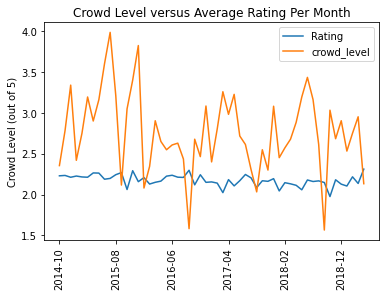

In [48]:
matchedRatings.plot(kind="line")
plt.title('Crowd Level versus Average Rating Per Month')
plt.ylabel('Crowd Level (out of 5)')
plt.xticks(rotation="vertical")
plt.show()